# Step 6: Analyze Model Performance

Use the code below to run TensorFlow Model Analysis on the model in your pipeline. Start by importing and opening the metadata store.

In [1]:
from __future__ import print_function

import os
import tfx_utils

def _make_default_sqlite_uri(pipeline_name):
    return os.path.join(os.environ['HOME'], 'airflow/tfx/metadata', pipeline_name, 'metadata.db')

def get_metadata_store(pipeline_name):
    return tfx_utils.TFXReadonlyMetadataStore.from_sqlite_db(_make_default_sqlite_uri(pipeline_name))

pipeline_name = 'taxi' # or taxi_solution
pipeline_db_path = _make_default_sqlite_uri(pipeline_name)
print('Pipeline DB:\n{}'.format(pipeline_db_path))

store = get_metadata_store(pipeline_name)

/home/tmy/anaconda3/envs/tfx-env/lib/python3.6/site-packages/apache_beam/__init__.py:84: UserWarning: Running the Apache Beam SDK on Python 3 is not yet fully supported. You may encounter buggy behavior or missing features.
  'Running the Apache Beam SDK on Python 3 is not yet fully supported. '


Pipeline DB:
/home/tmy/airflow/tfx/metadata/taxi/metadata.db


Now print out the model artifacts:

In [2]:
store.get_artifacts_of_type_df(tfx_utils.TFXArtifactTypes.MODEL)

,URI,TYPE_NAME,SPLIT,STATE,SPAN
ID,,,,,
14,/home/tmy/airflow/tfx/pipelines/taxi/Trainer/o...,ModelExportPath,,published,1


Now analyze the model performance:

In [3]:
store.display_tfma_analysis(14, slicing_column='trip_start_hour')

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


W0706 15:41:35.485561 140031768749824 deprecation.py:323] From /home/tmy/anaconda3/envs/tfx-env/lib/python3.6/site-packages/tensorflow_model_analysis/evaluators/metrics_and_plots_evaluator.py:83: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


SlicingMetricsViewer(config={'weightedExamplesColumn': 'post_export_metrics/example_count'}, data=[{'slice': '…

Now plot the artifact lineage:

<IPython.core.display.Javascript object>


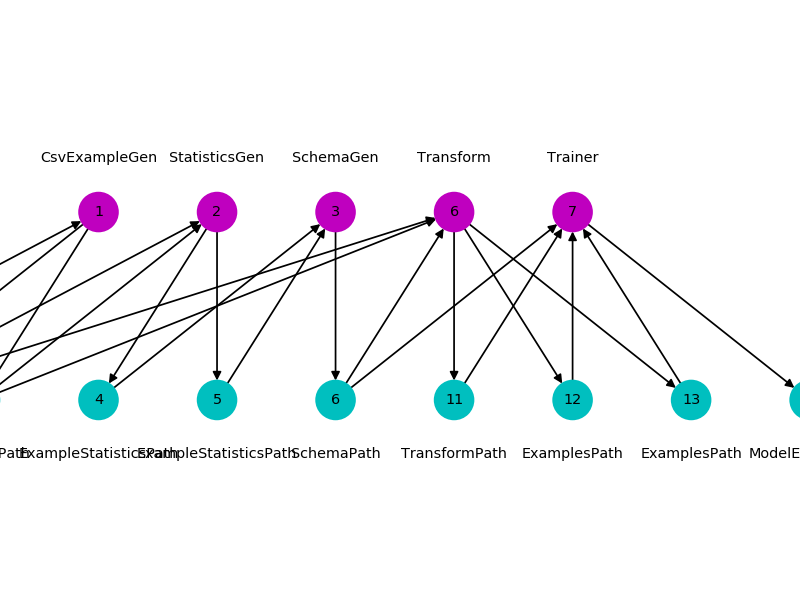

/home/tmy/anaconda3/envs/tfx-env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/tmy/anaconda3/envs/tfx-env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


In [5]:
# Try different IDs here. Click stop in the plot when changing IDs.
%matplotlib notebook
store.plot_artifact_lineage(14)